#### Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

#### Read new cleaned csv file

In [3]:
cacao = pd.read_csv('cleaned.csv')

# Correlation analysis

Let's find out which columns are correlated with the rating of chocolate bars. This will help to understand which parameters should be left for the model and which should be excluded.

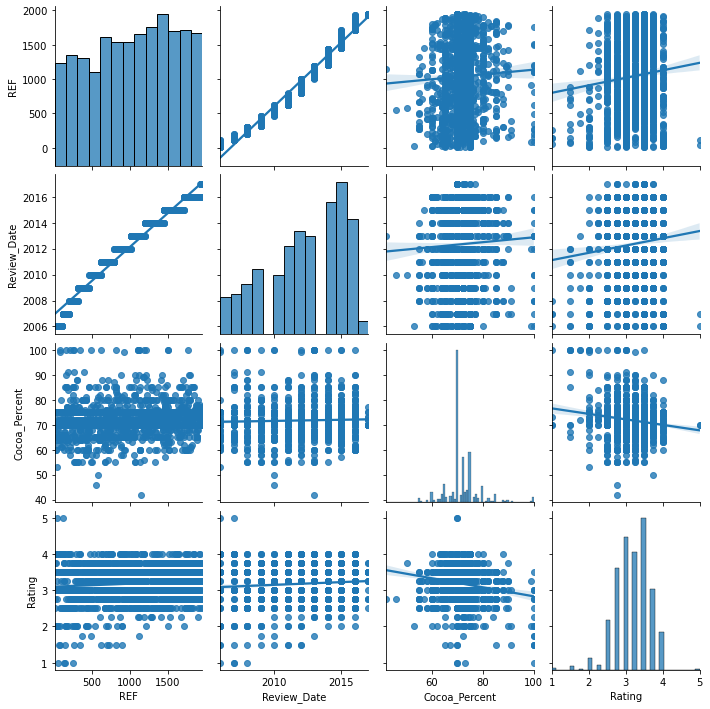

In [5]:
sns.pairplot(cacao, kind = 'reg')
plt.show()

I'll use the correlation matrix for clarity:

In [6]:
cacao.corr()

,REF,Review_Date,Cocoa_Percent,Rating
REF,1.000000,0.985031,0.040092,0.094600
Review_Date,0.985031,1.000000,0.041049,0.091798
Cocoa_Percent,0.040092,0.041049,1.000000,-0.165639
Rating,0.094600,0.091798,-0.165639,1.000000


Since the variables 'Review_Date' and 'REF' are almost completely correlated, one variable can be excluded. Let it be the REF variable. There will remain two variables that are weakly correlated with the **Rating**: Cocoa_Percent and Review_Date.

A positive correlation between the Review_Date parameter and Rating may indicate both that the bars really do get better over time, and that the ratings are simply overestimated over time.

# Analysis of nominative variables

I should find out do the rating distributions differ depending on the value of these variables.
Since there are a lot of unique values in the columns, i will take into consideration, for example, the 10 most frequent ones.

In [7]:
def get_boxplot(column):
    '''It takes a column and then plot a boxplot where y is Rating and source data is filtered by "10 most freq" '''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

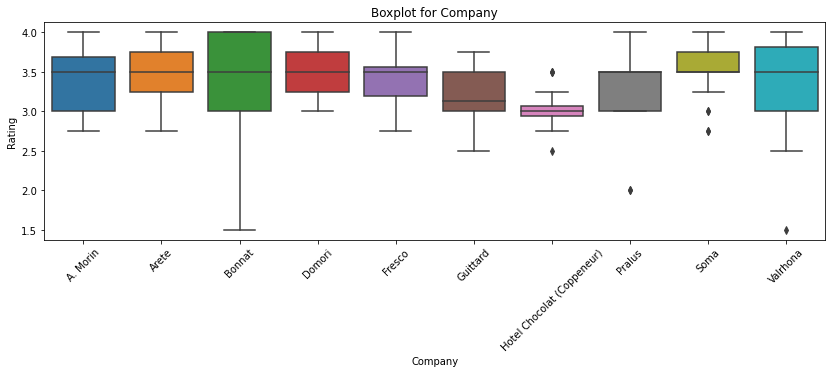

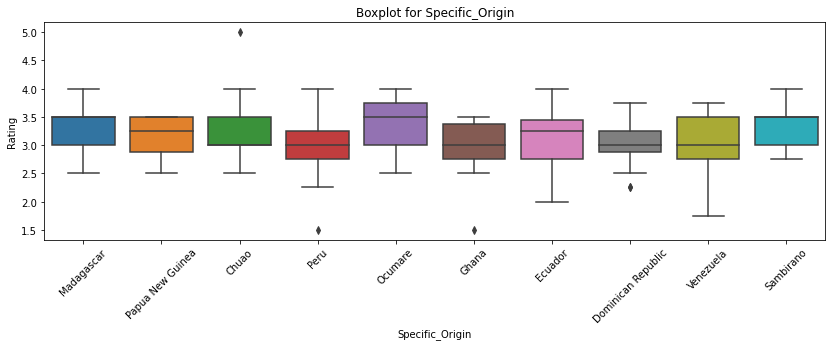

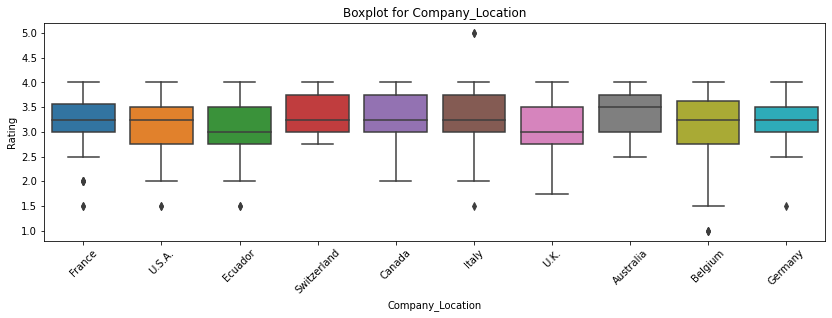

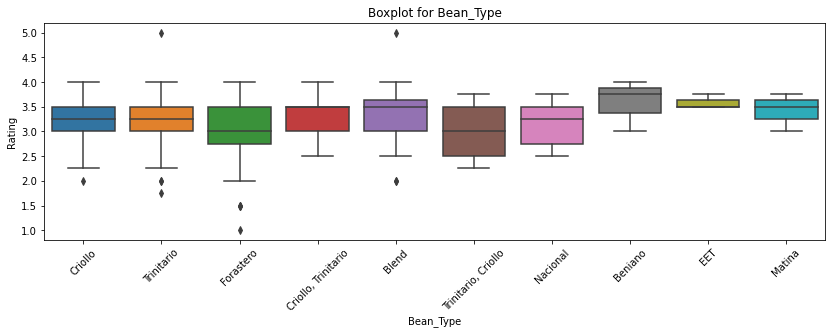

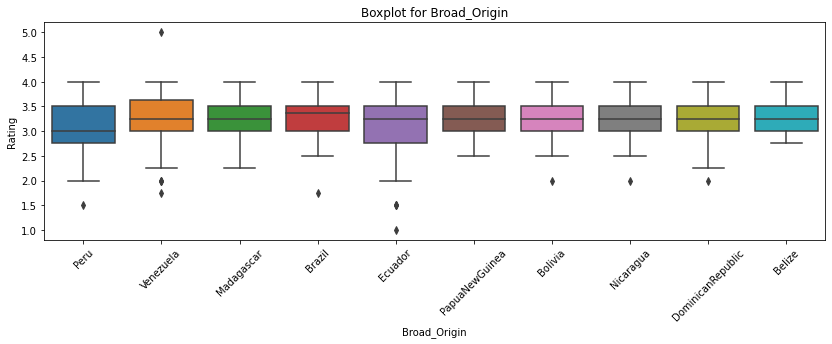

In [8]:
for col in cacao.loc[:, cacao.dtypes == object].columns: # i take all object type columns and pass them to get_boxplot
    get_boxplot(col)

From the graphs it looks like all parameters, except Broad_Origin, can somehow affect the rating of the choc.bar. Let's check if there is a statistical difference in the distribution of scores for nominative characteristics using the Student's t-test. I will test the null hypothesis that the distributions of the bar ratings by various parameters are indistinguishable:

In [17]:
def get_stat_dif(column):
    '''It takes a column, gets from it 10 most freq. val. , 
    generate all possible combinations(pairs) between them 
    and then t-test for every of them considering the Bonferroni correction'''
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'Rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'Rating']).pvalue \
            <= 0.05/len(combinations_all): # Bonferroni correction
            print('Found statistically significant differences for the column:', column)
            break

In [18]:
for col in cacao.loc[:, cacao.dtypes == object].columns:
    get_stat_dif(col)

Found statistically significant differences for the column: Company
Found statistically significant differences for the column: Specific_Origin
Found statistically significant differences for the column: Company_Location
Found statistically significant differences for the column: Bean_Type


As we can see, four parameters are 'seriously different': Company, Specific_Origin, Company_Location and Bean_Type. I leave these variables in the dataset for further model building. So, in this case, the important variables that may have an impact on the Rating are: Company, Specific_Origin, Company_location, Bean_Type, Review_date, Cocoa_Percent.

In [19]:
cacao_for_model = cacao.loc[:, ['Company', 'Specific_Origin', 'Company_Location', 'Bean_Type', 'Review_Date', 'Cocoa_Percent']]
cacao_for_model.head()

,Company,Specific_Origin,Company_Location,Bean_Type,Review_Date,Cocoa_Percent
0,A. Morin,Kpime,France,NaN,2015,70.0
1,A. Morin,Akata,France,NaN,2015,70.0
2,A. Morin,Quilla,France,NaN,2015,70.0
3,A. Morin,Carenero,France,Criollo,2014,70.0
4,A. Morin,Cuba,France,NaN,2014,70.0


# Summary

So, as a result of the EDA for the analysis of the effect of chocolate parameters on the expert assessment of chocolate bars, I can conclude:
- There are few empty values in the data, only the Bean_Type column was filled in a small number of cases.
- Outliers were found only in the columns with atings and cocoa content in chocolate bars, suggesting that the data is reasonably clean.
- A positive correlation between the Review_Date parameter and Rating may indicate that ratings are gradually overestimated over the years, or the bars are getting better.
- All mistakes were either solved or filled as NaN 
- The most important parameters that are proposed to be used in the future for building the model are Company, Specific_Origin, Company_location, Bean_Type, Review_date, Cocoa_Percent.